In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#Importando arquivo e colocando números em 2 casas decimais
fifa = pd.read_csv('Anexo_Projeto_fifa_world_national_teams_versao_oficial_20241.csv',encoding='latin',sep=';')
pd.options.display.float_format = '{:.2f}'.format

In [14]:
fifa.head()

,id,name,full_name,overall_rating,value_euro,wage_euro,nationality,national_team,club_team,age,...,crossing,finishing,heading_accuracy,short_passing,dribbling,jumping,strength,long_shots,aggression,GK_reflexes
0,158023,Messi,Lionel Andrés Messi Cuccittini,94,110500000,565000,Argentina,Argentina,FC Barcelona,31,...,86,95,70,92,97,68,66,94,48,8
1,153079,Aguero,Sergio Leonel Agüero del Castillo,89,64500000,300000,Argentina,Argentina,Manchester City,30,...,70,93,77,81,89,81,73,83,65,14
2,211110,Dybala,Paulo Bruno Exequiel Dybala,89,89000000,205000,Argentina,Argentina,Juventus,25,...,82,84,68,87,92,75,65,88,48,8
3,201399,Icardi,Mauro Emanuel Icardi Rivero,87,64500000,130000,Argentina,Argentina,Inter,26,...,46,91,91,73,77,94,76,70,56,9
4,226226,Lo Celso,Giovani Lo Celso,82,30000000,83000,Argentina,Argentina,Real Betis,22,...,75,77,59,82,84,64,69,76,65,14


In [4]:
#1. Lista de variável e seus tipos:
#Qualitativa nominal: nationality (Nacionalidade).
#Qualitativa ordinal: overall_rating (Classificação geral, que pode ser considerada ordinal dependendo da análise).
#Quantitativa discreta: age (Idade do jogador).
#Quantitativa contínua: value_euro (Valor de mercado do jogador).

In [5]:
# Tabela de frequência para nacionalidade (nationality)
freq_nacionalidade = fifa['nationality'].value_counts()

# Exibir as tabelas de frequência de time
print("Frequência de Nacionalidade:")
freq_nacionalidade.head()

Frequência de Nacionalidade:


nationality
England          23
United States    23
Brazil           23
Spain            23
Scotland         23
Name: count, dtype: int64

In [6]:
# Tabela de frequência para clube (club_team)
freq_clube = fifa['club_team'].value_counts()

# Exibir as tabelas de frequência de clube
print("\nFrequência de Clubes:")
freq_clube.head()


Frequência de Clubes:


club_team
Juventus             14
FC Bayern Munchen    14
Tottenham Hotspur    14
Celtic               12
Manchester United    12
Name: count, dtype: int64

In [13]:
# Seleção das variáveis
vars_to_analyze = ['overall_rating', 'value_euro', 'wage_euro', 'age', 'strength']

# Cálculo das medidas de posição e variabilidade
summary_stats = fifa[vars_to_analyze].describe().loc[['mean', '50%', 'std', 'min', 'max']]

# Renomear a linha "50%" para "media"
summary_stats.rename(index={'50%': 'media'}, inplace=True)

# Exibir a tabela
summary_stats.head()

,overall_rating,value_euro,wage_euro,age,strength
mean,76.46,13897694.99,49559.89,26.57,70.88
media,76.00,8000000.00,27000.00,26.00,72.00
std,6.02,16917513.81,65224.91,3.59,10.52
min,58.00,230000.00,1000.00,18.00,30.00
max,94.00,110500000.00,565000.00,37.00,94.00


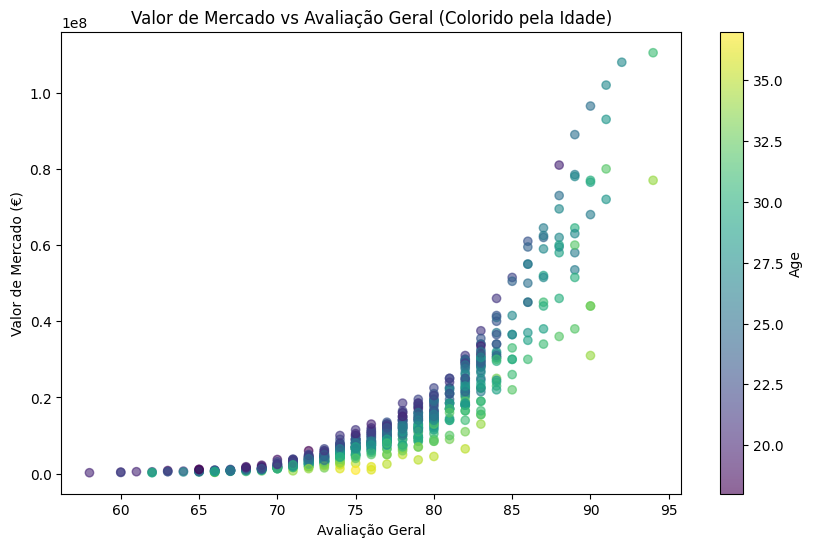

In [8]:
# Gráfico de Dispersão 
plt.figure(figsize=(10,6))
scatter = plt.scatter(fifa['overall_rating'], fifa['value_euro'], c=fifa['age'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Age')
plt.title('Valor de Mercado vs Avaliação Geral (Colorido pela Idade)')
plt.xlabel('Avaliação Geral')
plt.ylabel('Valor de Mercado (€)')
plt.show()

<Figure size 1000x600 with 0 Axes>

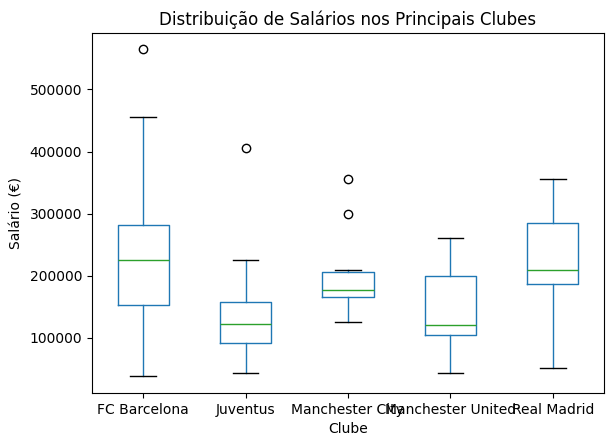

In [9]:
# Selecionar os 5 clubes com maiores salários médios
top_clubs = fifa.groupby('club_team')['wage_euro'].mean().nlargest(5).index

# Filtrar o DataFrame
df_top_clubs = fifa[fifa['club_team'].isin(top_clubs)]

# Criar o Boxplot
plt.figure(figsize=(10,6))
df_top_clubs.boxplot(column='wage_euro', by='club_team', grid=False)
plt.title('Distribuição de Salários nos Principais Clubes')
plt.suptitle('')
plt.xlabel('Clube')
plt.ylabel('Salário (€)')
plt.show()

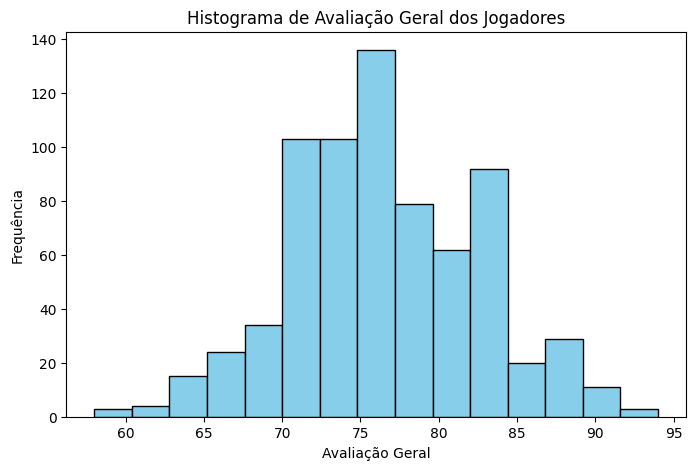

In [10]:
# Histograma de Avaliação Geral
plt.figure(figsize=(8,5))
plt.hist(fifa['overall_rating'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histograma de Avaliação Geral dos Jogadores')
plt.xlabel('Avaliação Geral')
plt.ylabel('Frequência')
plt.show()